In [109]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [110]:
df = pd.read_excel("/Users/Takatoshi/Desktop/BSSG/data/heat sim.xlsx")

In [142]:
df

,DOD,DCR,entropy change,temperature
0,0,132.0,-10.0,32.1
1,10,137.0,-13.8,43.6
2,20,142.0,-2.5,53.6
3,30,142.0,-11.3,62.9
4,40,142.0,-17.5,68.6
5,50,142.0,-21.3,75.0
6,60,142.0,-25.0,80.7
7,70,142.0,-40.0,85.7
8,80,142.0,-60.0,90.7
9,90,163.0,-63.8,95.7


In [112]:
cap = 1.8 # cell capacity(Ah)
i = 5.4   # current(A)
f = 96485 # Faraday constant(C/mol)
rT = 32.1 # room temperature(degree Celsius)
trans_coeff = 13 # heat transfer coefficient(W/m2K)
heat_cap = 40      # heat capacity(J/K)

In [113]:
df_Tdiff = df["temperature"]-rT # difference btw cell temp. - room temp.
sa = ((9*9*math.pi*2)+(65*18*math.pi))/(10**6) # surface area(m2)
trans = sa * trans_coeff
df_t = 1/(i/cap)*3600*df["DOD"]/100 # time at each DOD

In [114]:
df_dt = np.roll(df_t, 0) - np.roll(df_t, 1) 
df_dt[0] = 0

In [115]:
q_DCR = np.roll(df["DCR"]*(i**2)/1000, 1)
q_DCR[0] = 0

q_S = np.roll(-df["entropy change"]*(df["temperature"]+273)*i/f, 1)
q_S[0] = 0

q_rad = -np.roll(df_Tdiff, 1) * trans
q_rad[0] = 0

In [116]:
df_dT_DCR = q_DCR * df_dt / heat_cap
df_T_DCR = df_dT_DCR
for i in range(len(df_dT_DCR)-1):
    df_T_DCR[i+1] = df_T_DCR[i] +df_dT_DCR[i+1]
    
df_dT_S = q_S * df_dt / heat_cap
df_T_S = df_dT_S
for i in range(len(df_dT_S)-1):
    df_T_S[i+1] = df_T_S[i] +df_dT_S[i+1]
    
df_dT_rad = q_rad * df_dt / heat_cap
df_T_rad = df_dT_rad
for i in range(len(df_dT_rad)-1):
    df_T_rad[i+1] = df_T_rad[i] +df_dT_rad[i+1]

In [117]:
df_T = df_T_DCR + df_T_S + df_T_rad

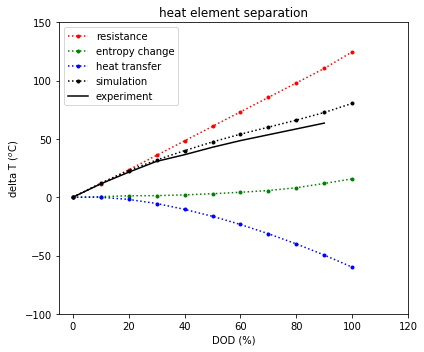

In [149]:
plt.figure(figsize=(6, 5))

plt.plot(df["DOD"], df_T_DCR, color="red", linestyle="dotted", marker=".", label="resistance")
plt.plot(df["DOD"], df_T_S, color="green", linestyle="dotted", marker=".", label="entropy change")
plt.plot(df["DOD"], df_T_rad, color="blue", linestyle="dotted", marker=".", label="heat transfer")
plt.plot(df["DOD"], df_T, color="black", linestyle="dotted", marker=".", label="simulation")
plt.plot(df["DOD"], df["temperature"]-rT, color="black", linestyle="solid", label="experiment")

plt.title("heat element separation")
plt.ylabel("delta T ($^o$C)")
plt.xlabel("DOD (%)")
plt.ylim(-100, 150)
plt.xlim(-5, 120)
plt.legend()
plt.tight_layout()

plt.show()